In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#plot style
plt.style.use(['default', 'seaborn-ticks'])
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 7
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

In [3]:
df = pd.read_csv("culled_data.csv.gz")
stats = pd.DataFrame()

In [4]:
df.columns

Index([u'line', u'delay', u'latitude', u'longitude', u'speed', u'time',
       u'vehicle', u'apparentTemperature', u'cloudCover', u'dewPoint',
       u'humidity', u'ozone', u'precipIntensity', u'precipProbability',
       u'precipType', u'pressure', u'temperature', u'uvIndex', u'visibility',
       u'windBearing', u'windGust', u'windSpeed', u'late', u'dayOfWeek',
       u'hourOfDay'],
      dtype='object')

In [5]:
#basic stats
mean_del = []
perc_late = []
perc_abit_late = []
perc_really_late = []
perc_ontime = []

stats['line'] = df.line.unique()

for line in stats.line:
    ln = df[df.line == line]
    mean_del.append(np.mean(ln.delay))
    on_time = len(ln[ln.late == 0])
    late = len(ln[ln.late == 1])
    abit_late = len(ln[ln.late == 1][ln.delay <= 60])
    really_late = len(ln[ln.late == 1][ln.delay >= 300])
    all_times = float(len(ln))
    perc_late.append(float(late) / all_times)
    perc_abit_late.append(float(abit_late) / all_times)
    perc_really_late.append(float(really_late) / all_times)
    perc_ontime.append(float(on_time) / all_times)
            
stats['mean_delay'] = mean_del
stats['percentage_late'] = perc_late
stats['percentage_ontime'] = perc_ontime
stats['percentage_abitlate'] = perc_abit_late
stats['percentage_really_late'] = perc_really_late

print(stats)

/Users/johanna/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/johanna/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


  line  mean_delay  percentage_late  percentage_ontime  percentage_abitlate  \
0  550   81.598477         0.724573           0.275427             0.319171   
1  94N   77.926086         0.732387           0.267613             0.239571   
2  731  227.141146         0.811797           0.188203             0.245606   
3   55  106.563301         0.826497           0.173503             0.247665   
4   83   87.668078         0.864038           0.135962             0.289101   

   percentage_really_late  
0                0.041331  
1                0.073741  
2                0.122791  
3                0.080313  
4                0.026430  


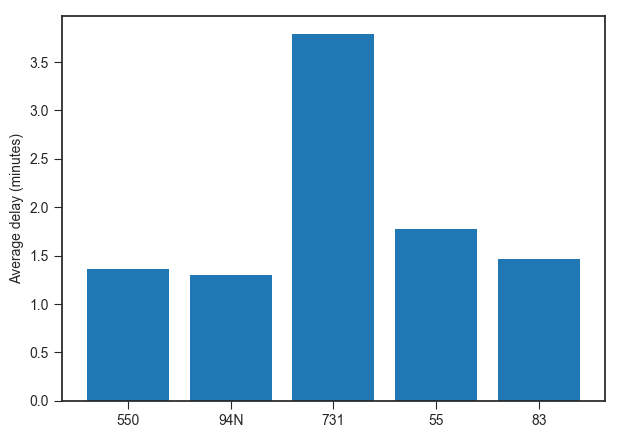

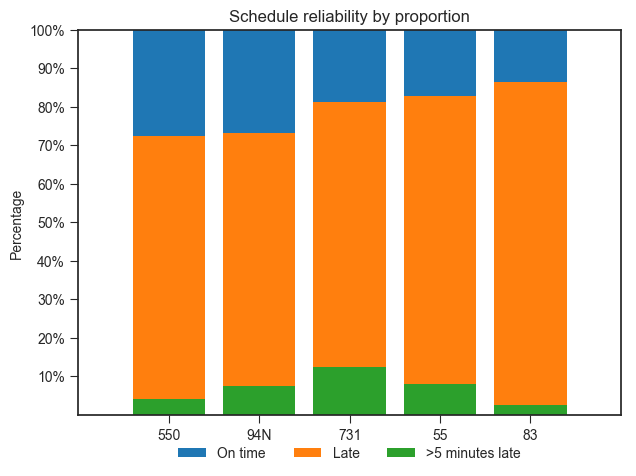

In [6]:
#plots!
#mean delay plot
plt.bar(range(5), stats.mean_delay / 60, align="center")
plt.xticks(np.arange(5), ('550', '94N', '731', '55', '83'))
plt.ylabel("Average delay (minutes)")
plt.show()

#percentage late/on time plot
plt.bar(range(5), stats.percentage_ontime, bottom=stats.percentage_late, align="center", label="On time")
plt.bar(range(5), stats.percentage_late, label="Late")
plt.bar(range(5), stats.percentage_really_late, label=">5 minutes late")
plt.axis([-1,5,0,1])
plt.title("Schedule reliability by proportion")
plt.xticks(np.arange(5), ('550', '94N', '731', '55', '83'))
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], ['10%', '20%', '30%', '40%', '50%', '60%', '70%','80%','90%','100%'])
plt.ylabel("Percentage")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=3)
plt.show()

[1.4392319455216254, 1.2575164239248076, 1.367591756667838, 1.4000120512992984, 2.2598656452173205, 2.7608135803842337, 1.7675203007518727]


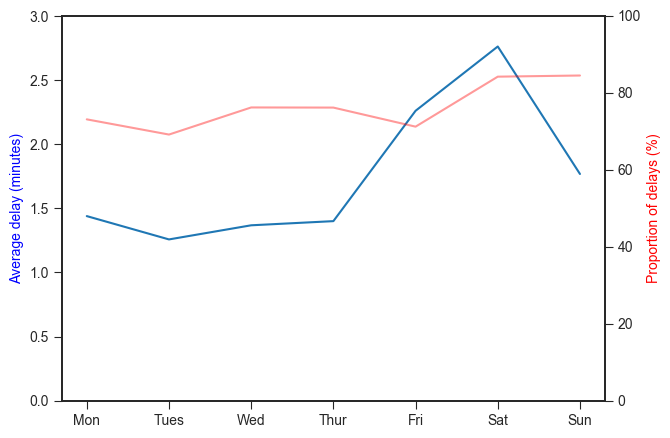

In [59]:
#mean delay by day plot
day_delays = []
day_delay_p = []
for i in range(7):
    ddl = df[df.dayOfWeek == i]
    day_delays.append(np.mean(ddl.delay / 60))
    day_delay_p.append(float(len(ddl[ddl.late == 1])) / float(len(ddl)))
print(day_delays)

fi, ax1 = plt.subplots()
ax1.plot(day_delays)
plt.xticks(range(7), ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
ax1.axis([-0.5,6.5,0,3])
ax1.set_ylabel("Average delay (minutes)", color='b')

ax2 = ax1.twinx()
ax2.plot([x * 100 for x in day_delay_p], 'r', alpha=0.4)
ax2.set_ylim([0,100])
ax2.set_ylabel("Proportion of delays (%)", color='r')
plt.show()

[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  0  1  2  3]
[1.441628498727735, 1.5886775562259192, 1.0104343143248051, 0.6711324829587648, 1.0423535414444176, 1.2796022601596602, 1.5143383481731636, 1.7140485274228452, 1.6394054294615368, 1.1232143371654186, 1.07445373719108, 1.0774059492563481, 1.7368746033059907, 1.6239214483540645, 1.99694942528737, 1.8831350272511111, 2.9586541842475365, 1.4996233148294904, 1.4316765315930564, 1.4989218770481052, 1.1433477842003914, 0.959927983539095]


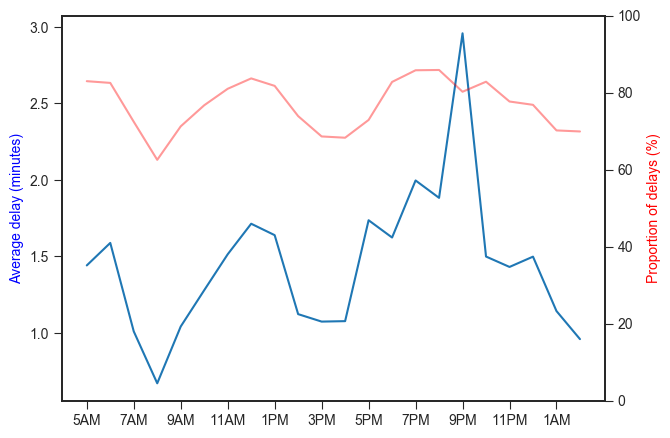

In [78]:
#mean delay by hour of day plot
print(df.hourOfDay.unique())
hour_delays = []
hour_delay_p = []
for i in [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,1,2]:
    hdl = df[df.hourOfDay == i]
    hour_delays.append(np.mean(hdl.delay / 60))
    hour_delay_p.append(float(len(hdl[hdl.late == 1])) / float(len(hdl)))
    
print(hour_delays)

fi, ax1 = plt.subplots()
ax1.plot(hour_delays)
plt.xticks(np.arange(0, 22, 2), ['5AM', '7AM', '9AM', '11AM', '1PM', '3PM', '5PM', '7PM', '9PM', '11PM', '1AM'])
#ax1.axis([-0.5,6.5,0,10])
ax1.set_ylabel("Average delay (minutes)", color='b')

ax2 = ax1.twinx()
ax2.plot([x * 100 for x in hour_delay_p], 'r', alpha=0.4)
ax2.set_ylim([0,100])
ax2.set_ylabel("Proportion of delays (%)", color='r')
plt.show()

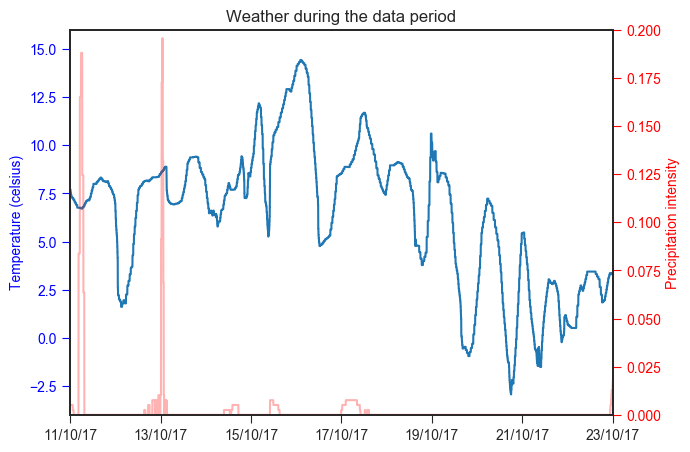

In [57]:
#weather stats
fig, ax1 = plt.subplots()
ax1.plot(df.temperature)
plt.title("Weather during the data period")
ax1.set_ylabel("Temperature (celsius)", color='b')
ax1.tick_params('y', colors='b')
ax1.axis([0,len(df.temperature), -4,16])
plt.xticks(np.arange(0, len(df.temperature), 56787), ['11/10/17', '13/10/17', '15/10/17', '17/10/17', '19/10/17', '21/10/17', '23/10/17'])

ax2 = ax1.twinx()
ax2.plot(df.precipIntensity, 'r', alpha=0.3)
ax2.set_ylabel('Precipitation intensity', color='r')
ax2.tick_params('y', colors='r')
ax2.axis([0,len(df.precipIntensity),0,0.200])
plt.show()